In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
from tensorflow.keras import applications

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import time
import os

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet import preprocess_input
from keras.applications.efficientnet import EfficientNetB7

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [ ]:
cd '/content/drive/MyDrive/CVProject/'

/content/drive/MyDrive/CVProject


In [ ]:
! ls

CVProject_EfficientNetB7.ipynb	Dataset
CVProject_MobileNet.h5		Landmark_Detection_MER.pdf


In [ ]:
train_data = '/content/drive/MyDrive/CVProject/Dataset'

In [ ]:
image_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.2, 1),
    shear_range=45,
    zoom_range=(0.5, 1.5),
    fill_mode='reflect',
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.2
    )

In [ ]:
train_gen = image_gen.flow_from_directory(
    train_data,
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32,
    seed=0,
    subset='training'
    )

Found 309 images belonging to 18 classes.


In [ ]:
val_gen = image_gen.flow_from_directory(
    train_data,
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32,
    seed=0,
    subset='validation'
    )

Found 66 images belonging to 18 classes.


In [ ]:
train_gen.class_indices

{'ACADEMIC BLOCK': 0,
 'ADMIN BLOCK': 1,
 'BASKET BALL COURT': 2,
 'BH-1': 3,
 'BH-2': 4,
 'BH-3': 5,
 'BIO-DIVERSITY': 6,
 'CAFETERIA': 7,
 'DIRECTOR HOUSE': 8,
 'DISPENSARY': 9,
 'FOOTBALL': 10,
 'GH': 11,
 'IVH': 12,
 'LRC': 13,
 'MAIN GATE': 14,
 'MDP': 15,
 'OAT': 16,
 'sports complex': 17}

In [ ]:
base_model = EfficientNetB7(include_top=False,
                        weights='imagenet',
                        input_shape=(224,224,3),
                        pooling='avg')
# 'EfficientNetB7': {'model': applications.efficientnet.EfficientNetB7,
#                        'preprocess_func': applications.efficientnet.preprocess_input}

end_model = models.Sequential()
end_model.add(layers.Flatten(input_shape=base_model.output_shape[1:]))
end_model.add(layers.Dense(128))
end_model.add(layers.ReLU())
end_model.add(layers.Dense(64))
end_model.add(layers.LeakyReLU())
end_model.add(layers.Dense(18, activation='softmax'))

model = models.Model(inputs=base_model.input, outputs=end_model(base_model.output))

for layer in base_model.layers:
    layer.trainable = False

model.summary()

258076736/258076736 [==============================] - 12s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLamb

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=3,
                                        mode='min',
                                        restore_best_weights=True)

In [ ]:
history = model.fit(
    train_gen,
    epochs=25,
    validation_data=val_gen,
    callbacks=[early_stopping_callback]
    )

Epoch 1/25
10/10 [==============================] - 391s 35s/step - loss: 2.5398 - accuracy: 0.2557 - val_loss: 2.0964 - val_accuracy: 0.4242
Epoch 2/25
10/10 [==============================] - 228s 22s/step - loss: 1.6608 - accuracy: 0.5469 - val_loss: 1.4411 - val_accuracy: 0.5909
Epoch 3/25
10/10 [==============================] - 230s 23s/step - loss: 1.0385 - accuracy: 0.7638 - val_loss: 1.0411 - val_accuracy: 0.7121
Epoch 4/25
10/10 [==============================] - 226s 22s/step - loss: 0.6931 - accuracy: 0.8414 - val_loss: 0.9143 - val_accuracy: 0.7121
Epoch 5/25
10/10 [==============================] - 240s 24s/step - loss: 0.4459 - accuracy: 0.8932 - val_loss: 0.9001 - val_accuracy: 0.7273
Epoch 6/25
10/10 [==============================] - 227s 22s/step - loss: 0.3427 - accuracy: 0.9191 - val_loss: 0.7268 - val_accuracy: 0.8030
Epoch 7/25
10/10 [==============================] - 234s 23s/step - loss: 0.3239 - accuracy: 0.9191 - val_loss: 0.7745 - val_accuracy: 0.7576
Epoch 

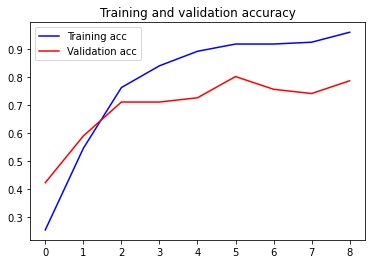

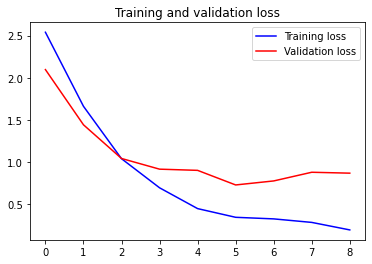

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('./CVProject_EfficientNetB7.h5')

In [ ]:
! ls

CVProject.ipynb  Dataset  Landmark_Detection_MER.pdf
